<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/%E5%9B%9E%E5%BD%922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
from google.colab import files

In [27]:
from scipy import stats

In [ ]:
a=pandas.read_csv("data999.csv")
a

,date,欧洲平均电价（左轴）,TTF期货连一（右轴）
0,2018/1/2,36.501034,19.35
1,2018/1/3,37.657293,19.40
2,2018/1/4,39.648723,19.18
3,2018/1/5,40.085553,18.90
4,2018/1/8,50.262435,19.08
...,...,...,...
1248,2022/12/12,320.002009,136.15
1249,2022/12/13,316.037009,139.90
1250,2022/12/14,300.517480,131.75
1251,2022/12/15,301.620934,134.50


In [17]:
x = a["TTF期货连一（右轴）"]
y = a["欧洲平均电价（左轴）"]

In [14]:
from google.colab import files
files.upload()

Saving simkai.ttf to simkai.ttf


In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

zhfont = mpl.font_manager.FontProperties(fname='simkai.ttf')

In [28]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept, r, p, std_err)

1.6052977096234826 22.11582389195206 0.9556706888358422 0.0 0.013983375495333353


In [29]:
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

In [30]:
regression_equation="y="+"{:.2f}".format(slope)+"*x+"+"{:.2f}".format(intercept)+"\nR:"+"{:.2f}".format(r)+"\nP:"+"{:.4f}".format(p)

In [34]:
y_pred= mymodel
print(y_pred)
std=np.std(y_pred)

[53.17833457316645, 53.25859945864762, 52.90543396253045, 52.45595060383588, 52.74490419156811, 53.627817931861024, 53.09806968768528, 53.22649350445515, 53.86861258830455, 52.777010145760585, 52.45595060383588, 51.70146068031285, 51.62119579483167, 51.33224220709944, 51.894096405467664, 51.284083275810744, 50.609858237768876, 50.81854694001993, 50.57775228357641, 49.88747426843831, 50.04800403940065, 50.979076710982284, 51.1717124361371, 51.1717124361371, 50.369063581325356, 51.01118266517474, 51.1717124361371, 50.65801716905759, 50.81854694001993, 50.979076710982284, 51.41250709258062, 51.01118266517474, 50.69012312325005, 51.57303686354297, 52.74490419156811, 53.90071854249702, 53.692029840245965, 53.980983427978195, 54.78363228278994, 51.97436129094884, 52.74490419156811, 54.38230785538406, 50.41722251261406, 50.64196419196135, 50.20853381036301, 50.41722251261406, 50.64196419196135, 51.65330174902414, 52.61648037479823, 53.57965900057232, 53.06596373349281, 51.94225533675636, 52.2

In [56]:
regression_equation

'y=1.61*x+22.12\nR:0.96\nP:0.0000'

In [35]:
std_z = 1.96 # from z-table for 95%
confidence_interval = std * std_z

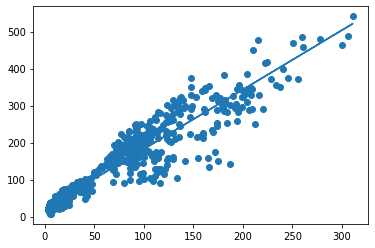

In [37]:
plt.scatter(x, y)
plt.plot(x, mymodel,label=regression_equation)
# plt.plot(x, y_pred - confidence_interval)
# plt.plot(x, y_pred + confidence_interval)

In [50]:
font_dict=dict(fontsize=200,
              color='k',
              family='SimHei',
              weight='light',
              style='italic',
              )

Text(0, 0.5, '欧洲平均电价（欧元/MWH）')

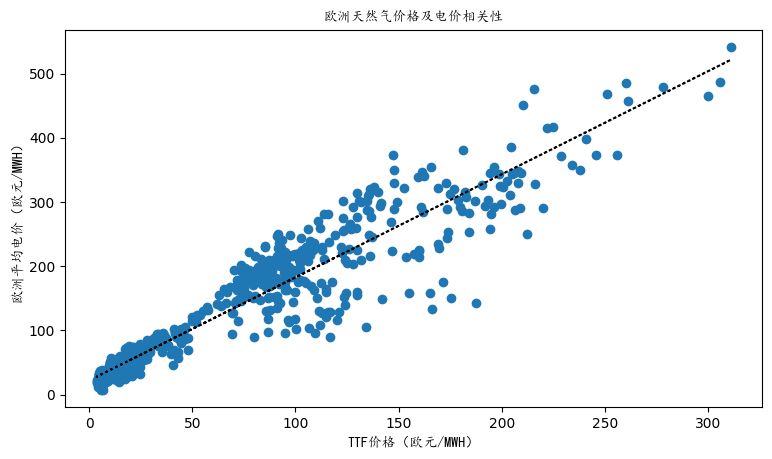

In [59]:
plt.subplots(figsize=(9,5),dpi=100)
plt.scatter(x,y)
plt.plot(x, mymodel,linestyle=":",color="k")
plt.title('欧洲天然气价格及电价相关性',size=200,fontproperties=zhfont)
plt.xlabel('TTF价格（欧元/MWH）',fontproperties=zhfont)
plt.ylabel('欧洲平均电价（欧元/MWH）',fontproperties=zhfont)